In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing dataset
df_world = pd.read_csv("FAOSTAT_data_en_11-29-2022.csv")

In [3]:
df_world.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112.0,Maize (corn),1961,1961,ha,500000.0,A,Official figure
1,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112.0,Maize (corn),1962,1962,ha,500000.0,A,Official figure
2,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112.0,Maize (corn),1963,1963,ha,500000.0,A,Official figure
3,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112.0,Maize (corn),1964,1964,ha,505000.0,A,Official figure
4,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112.0,Maize (corn),1965,1965,ha,500000.0,A,Official figure


In [4]:
df_world.shape

(127449, 14)

In [5]:
df_world.describe()

,Area Code (M49),Element Code,Item Code (CPC),Year Code,Year,Value
count,127449.000000,127449.000000,127449.000000,127449.000000,127449.000000,1.248490e+05
mean,422.794647,5413.571531,594.105074,1991.977316,1991.977316,1.609611e+06
std,255.845086,81.503497,662.438120,17.212714,17.212714,1.048021e+07
min,4.000000,5312.000000,111.000000,1961.000000,1961.000000,0.000000e+00
25%,191.000000,5312.000000,112.000000,1977.000000,1977.000000,1.021700e+04
50%,410.000000,5419.000000,113.000000,1993.000000,1993.000000,4.472600e+04
75%,634.000000,5510.000000,1510.000000,2007.000000,2007.000000,2.242260e+05
max,894.000000,5510.000000,1520.010000,2020.000000,2020.000000,4.122622e+08


In [6]:
df_world.describe(include=object)
#Only one domain and one domain code- these do not offer any additional information about the rows as they are the same in all cases
#Remove these to improve legibility of table

,Domain Code,Domain,Area,Element,Item,Unit,Flag,Flag Description
count,127449,127449,127449,127449,127449,127449,127449,127449
unique,1,1,206,3,6,3,5,5
top,QCL,Crops and livestock products,Zimbabwe,Area harvested,Maize (corn),ha,A,Official figure
freq,127449,127449,1080,43110,27642,43110,63154,63154


In [7]:
#Remove columns
df_world = df_world.drop(["Domain Code"], axis=1)
df_world.head()

,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,Crops and livestock products,4,Afghanistan,5312,Area harvested,112.0,Maize (corn),1961,1961,ha,500000.0,A,Official figure
1,Crops and livestock products,4,Afghanistan,5312,Area harvested,112.0,Maize (corn),1962,1962,ha,500000.0,A,Official figure
2,Crops and livestock products,4,Afghanistan,5312,Area harvested,112.0,Maize (corn),1963,1963,ha,500000.0,A,Official figure
3,Crops and livestock products,4,Afghanistan,5312,Area harvested,112.0,Maize (corn),1964,1964,ha,505000.0,A,Official figure
4,Crops and livestock products,4,Afghanistan,5312,Area harvested,112.0,Maize (corn),1965,1965,ha,500000.0,A,Official figure


In [8]:
df_world.nunique()
#Element and element code both convey the same information- one is extraneous
#Area and area code both convey the same information- one is extraneous
#Item and item code both convey the same information- one is extraneous
#Year and year code both convey the same information- one is extraneous
#Flag and flag description both convey the same information- one is extraneous 

Domain                  1
Area Code (M49)       206
Area                  206
Element Code            3
Element                 3
Item Code (CPC)         6
Item                    6
Year Code              60
Year                   60
Unit                    3
Value               72669
Flag                    5
Flag Description        5
dtype: int64

In [9]:
#Remove extraneous columns
df_world = df_world.drop(["Element Code", "Area Code (M49)", "Item Code (CPC)", "Year Code", "Flag Description"], axis=1)
df_world.head()

,Domain,Area,Element,Item,Year,Unit,Value,Flag
0,Crops and livestock products,Afghanistan,Area harvested,Maize (corn),1961,ha,500000.0,A
1,Crops and livestock products,Afghanistan,Area harvested,Maize (corn),1962,ha,500000.0,A
2,Crops and livestock products,Afghanistan,Area harvested,Maize (corn),1963,ha,500000.0,A
3,Crops and livestock products,Afghanistan,Area harvested,Maize (corn),1964,ha,505000.0,A
4,Crops and livestock products,Afghanistan,Area harvested,Maize (corn),1965,ha,500000.0,A


In [10]:
df_world.isnull().sum() #There are some missing values

Domain        0
Area          0
Element       0
Item          0
Year          0
Unit          0
Value      2600
Flag          0
dtype: int64

In [11]:
df_world.dtypes

Domain      object
Area        object
Element     object
Item        object
Year         int64
Unit        object
Value      float64
Flag        object
dtype: object

In [12]:
df_world["Flag"].value_counts()
#A means official figure
#E means estimated value
#I means imputed value
#T means unofficial figure
#M means missing value- we can remove these columns (there are two more also somewhere else)

A    63154
E    52030
I     6539
T     3128
M     2598
Name: Flag, dtype: int64

In [13]:
#Remove values where flag column is M
df_world = df_world[df_world.Flag != "M"] 
df_world["Flag"].value_counts() # Check if the removal worked

A    63154
E    52030
I     6539
T     3128
Name: Flag, dtype: int64

In [14]:
#What elements are there in the dataset
df_world["Element"].value_counts()

Production        41800
Area harvested    41799
Yield             41252
Name: Element, dtype: int64

First, look at the worldwide production of crops. The trends in production will be evaluated overall and by country. Challenges faced with regards to the visualisation of data by country include the conversion of the data within the "Area" column of the dataset to ISO 3166 values. These challenges include dealing with historical data from regions like USSR and Yugoslavia, which no longer exist and have split into multiple countries today.

In [15]:
#Create subset to analyse production
df_world_production = df_world.loc[df_world["Element"] == "Production"]
df_world_production["Element"].value_counts() #Check if transformation worked

Production    41800
Name: Element, dtype: int64

In [16]:
df_world_production.head()

,Domain,Area,Element,Item,Year,Unit,Value,Flag
120,Crops and livestock products,Afghanistan,Production,Maize (corn),1961,tonnes,700000.0,A
121,Crops and livestock products,Afghanistan,Production,Maize (corn),1962,tonnes,700000.0,A
122,Crops and livestock products,Afghanistan,Production,Maize (corn),1963,tonnes,713000.0,A
123,Crops and livestock products,Afghanistan,Production,Maize (corn),1964,tonnes,720000.0,A
124,Crops and livestock products,Afghanistan,Production,Maize (corn),1965,tonnes,720000.0,A


In [17]:
df_world_production["Element"].value_counts()

Production    41800
Name: Element, dtype: int64

In [18]:
df_world_production["Unit"].value_counts()
#Referencing the data source, all data in the data subset df_world_production refer to the production of crops and livestock products, which are measured in tonnes in all cases

tonnes    41800
Name: Unit, dtype: int64

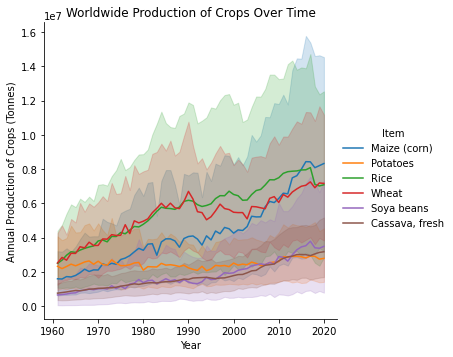

In [19]:
#Look at the relative production of the each crop to be analysed- worldwide
sns.relplot(
    data=df_world_production, kind="line",
    x="Year", y="Value", hue="Item"
).set(
    title="Worldwide Production of Crops Over Time", xlabel="Year", ylabel="Annual Production of Crops (Tonnes)"
)
#Production trends upwards over time in all cases
#There is a large range over different countries fro all crops

In [20]:
#Install altair
#!pip install altair

In [21]:
#Importing libraries
import altair as alt
import json
from altair import datum

In [22]:
df_world_production["Year"].value_counts()
#Most recent year is 2020

2020    794
2018    794
2019    792
2006    766
2017    763
2005    763
2004    762
2003    761
2016    761
2013    759
2014    759
2015    759
2012    759
2002    758
2011    758
2010    758
2008    758
2001    758
2000    757
2007    757
2009    757
1995    755
1996    754
1997    753
1999    752
1998    752
1994    752
1993    751
1992    750
1991    682
1990    680
1989    662
1988    661
1987    655
1986    654
1985    651
1984    647
1983    646
1977    643
1982    643
1980    643
1981    642
1979    641
1978    641
1976    640
1975    637
1974    633
1973    631
1972    628
1971    626
1970    622
1969    619
1968    616
1967    615
1966    614
1961    612
1965    611
1964    611
1963    611
1962    611
Name: Year, dtype: int64

In [23]:
#What crops are being evaluated
df_world_production["Item"].value_counts()

Maize (corn)      9152
Potatoes          8396
Rice              7019
Wheat             6666
Cassava, fresh    5880
Soya beans        4687
Name: Item, dtype: int64

In [24]:
#Extract Maize (corn) from the dataset
df_world_production_corn = df_world_production.loc[df_world_production["Item"] == "Maize (corn)"]
df_world_production_corn["Item"].value_counts() #Check if extraction worked

Maize (corn)    9152
Name: Item, dtype: int64

In [25]:
#!pip install country_converter --upgrade

In [26]:
#!pip install pycountry

In [27]:
import plotly.express as px
import country_converter as coco
import pycountry
cc = coco.CountryConverter()

In [28]:
df_world_production_corn["Country Code"] = coco.convert(df_world_production_corn["Area"], to = "ISO3")
df_world_production_corn.head()
#Some countries need to be renamed to create a column containing ISO 3166 values
#Belgium-Luxembourg is challenging to classify= The largest province of Belgium is known as Luxembourg, however there is also a neighbouring country called Luxembourg
#USSR has since split into multiple countries- it is likely that this historical data should be compared to multiple countries today
#Yugosalv SFR has the same problem as the USSR
#Serbia and Montenegro may be found in regex if the name is converted to Serbia

Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxembourg not found in regex
Belgium-Luxe

,Domain,Area,Element,Item,Year,Unit,Value,Flag,Country Code
120,Crops and livestock products,Afghanistan,Production,Maize (corn),1961,tonnes,700000.0,A,AFG
121,Crops and livestock products,Afghanistan,Production,Maize (corn),1962,tonnes,700000.0,A,AFG
122,Crops and livestock products,Afghanistan,Production,Maize (corn),1963,tonnes,713000.0,A,AFG
123,Crops and livestock products,Afghanistan,Production,Maize (corn),1964,tonnes,720000.0,A,AFG
124,Crops and livestock products,Afghanistan,Production,Maize (corn),1965,tonnes,720000.0,A,AFG


In [29]:
#Look for data relating to Belgium-Luxembourg
df_world_production_corn.loc[df_world_production_corn["Area"] == "Belgium-Luxembourg"]
#The data only extends to 1999

,Domain,Area,Element,Item,Year,Unit,Value,Flag,Country Code
9308,Crops and livestock products,Belgium-Luxembourg,Production,Maize (corn),1961,tonnes,2441.0,A,not found
9309,Crops and livestock products,Belgium-Luxembourg,Production,Maize (corn),1962,tonnes,3472.0,A,not found
9310,Crops and livestock products,Belgium-Luxembourg,Production,Maize (corn),1963,tonnes,2074.0,A,not found
9311,Crops and livestock products,Belgium-Luxembourg,Production,Maize (corn),1964,tonnes,2087.0,A,not found
9312,Crops and livestock products,Belgium-Luxembourg,Production,Maize (corn),1965,tonnes,2337.0,A,not found
9313,Crops and livestock products,Belgium-Luxembourg,Production,Maize (corn),1966,tonnes,2555.0,A,not found
9314,Crops and livestock products,Belgium-Luxembourg,Production,Maize (corn),1967,tonnes,2961.0,A,not found
9315,Crops and livestock products,Belgium-Luxembourg,Production,Maize (corn),1968,tonnes,3483.0,A,not found
9316,Crops and livestock products,Belgium-Luxembourg,Production,Maize (corn),1969,tonnes,4479.0,A,not found
9317,Crops and livestock products,Belgium-Luxembourg,Production,Maize (corn),1970,tonnes,10246.0,A,not found


In [30]:
#Look for data relating to Belgium
df_world_production_corn.loc[df_world_production_corn["Area"] == "Belgium"]
#The data starts where the Belgium-Luxembourg data end- 2000

,Domain,Area,Element,Item,Year,Unit,Value,Flag,Country Code
9077,Crops and livestock products,Belgium,Production,Maize (corn),2000,tonnes,397400.0,A,BEL
9078,Crops and livestock products,Belgium,Production,Maize (corn),2001,tonnes,460900.0,A,BEL
9079,Crops and livestock products,Belgium,Production,Maize (corn),2002,tonnes,530700.0,A,BEL
9080,Crops and livestock products,Belgium,Production,Maize (corn),2003,tonnes,554743.0,A,BEL
9081,Crops and livestock products,Belgium,Production,Maize (corn),2004,tonnes,637807.0,A,BEL
9082,Crops and livestock products,Belgium,Production,Maize (corn),2005,tonnes,634088.0,A,BEL
9083,Crops and livestock products,Belgium,Production,Maize (corn),2006,tonnes,575898.0,A,BEL
9084,Crops and livestock products,Belgium,Production,Maize (corn),2007,tonnes,698899.0,A,BEL
9085,Crops and livestock products,Belgium,Production,Maize (corn),2008,tonnes,858837.0,A,BEL
9086,Crops and livestock products,Belgium,Production,Maize (corn),2009,tonnes,807866.0,A,BEL


In [31]:
#Look for data relating to Luxembourg
df_world_production_corn.loc[df_world_production_corn["Area"] == "Luxembourg"]
#The data starts where the Belgium-Luxembourg data end- 2000
#There is only data available for the two countries combined prior to 2000 due to the BLEU
#We cannot tell anything about production in general for the two separate regions based of this
#It may be the case that a majority occurred on land in Belgium rather than Luxembourg, or vice versa
#This data should be removed so as to not cause inaccuracies in trends observed

,Domain,Area,Element,Item,Year,Unit,Value,Flag,Country Code
68135,Crops and livestock products,Luxembourg,Production,Maize (corn),2000,tonnes,2040.0,A,LUX
68136,Crops and livestock products,Luxembourg,Production,Maize (corn),2001,tonnes,4331.0,A,LUX
68137,Crops and livestock products,Luxembourg,Production,Maize (corn),2002,tonnes,2317.0,A,LUX
68138,Crops and livestock products,Luxembourg,Production,Maize (corn),2003,tonnes,1902.0,A,LUX
68139,Crops and livestock products,Luxembourg,Production,Maize (corn),2004,tonnes,3611.0,A,LUX
68140,Crops and livestock products,Luxembourg,Production,Maize (corn),2005,tonnes,2060.0,A,LUX
68141,Crops and livestock products,Luxembourg,Production,Maize (corn),2006,tonnes,1875.0,A,LUX
68142,Crops and livestock products,Luxembourg,Production,Maize (corn),2007,tonnes,2120.0,A,LUX
68143,Crops and livestock products,Luxembourg,Production,Maize (corn),2008,tonnes,2276.0,A,LUX
68144,Crops and livestock products,Luxembourg,Production,Maize (corn),2009,tonnes,2453.0,A,LUX


In [34]:
#Remove data with Belgium-Luxembourg in the "Area" column
df_world_production_corn = df_world_production_corn[df_world_production_corn.Area != "Belgium-Luxembourg"]

In [35]:
#Check if removal worked
df_world_production_corn.loc[df_world_production_corn["Area"] == "Belgium-Luxembourg"] #It worked

,Domain,Area,Element,Item,Year,Unit,Value,Flag,Country Code


In [36]:
#Look at data for Taiwan
df_world_production_corn.loc[df_world_production_corn["Area"] == "China, Taiwan Province of"]
#Returns both country codes for China and Taiwan
#While Taiwan in not recognised as a country by the UN, and isn't legally recognised as a country in most geopolitical arenas,
#It is usually understood to be a sovereign political region
#The data is whole and at no point represents any region outside of it's boarders, even if the ownership of the land is debated
#Based off this consideration, Taiwan will be classified as TWN for this analysis

,Domain,Area,Element,Item,Year,Unit,Value,Flag,Country Code
25810,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1961,tonnes,27091.0,A,"[CHN, TWN]"
25811,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1962,tonnes,36265.0,A,"[CHN, TWN]"
25812,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1963,tonnes,34528.0,A,"[CHN, TWN]"
25813,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1964,tonnes,42100.0,A,"[CHN, TWN]"
25814,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1965,tonnes,41079.0,A,"[CHN, TWN]"
25815,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1966,tonnes,51639.0,A,"[CHN, TWN]"
25816,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1967,tonnes,64082.0,A,"[CHN, TWN]"
25817,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1968,tonnes,51485.0,A,"[CHN, TWN]"
25818,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1969,tonnes,44781.0,A,"[CHN, TWN]"
25819,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1970,tonnes,57416.0,A,"[CHN, TWN]"


In [37]:
#Create dataframe with just data for Taiwan
df_world_production_corn_TWN = df_world_production_corn.loc[df_world_production_corn["Area"] == "China, Taiwan Province of"]
df_world_production_corn_TWN.head()

,Domain,Area,Element,Item,Year,Unit,Value,Flag,Country Code
25810,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1961,tonnes,27091.0,A,"[CHN, TWN]"
25811,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1962,tonnes,36265.0,A,"[CHN, TWN]"
25812,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1963,tonnes,34528.0,A,"[CHN, TWN]"
25813,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1964,tonnes,42100.0,A,"[CHN, TWN]"
25814,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1965,tonnes,41079.0,A,"[CHN, TWN]"


In [38]:
#Drop country code column
df_world_production_corn_TWN = df_world_production_corn_TWN.drop(["Country Code"], axis=1)
df_world_production_corn_TWN.head()

,Domain,Area,Element,Item,Year,Unit,Value,Flag
25810,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1961,tonnes,27091.0,A
25811,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1962,tonnes,36265.0,A
25812,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1963,tonnes,34528.0,A
25813,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1964,tonnes,42100.0,A
25814,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1965,tonnes,41079.0,A


In [40]:
#Add new column with the new Country Code Classification
df_world_production_corn_TWN["Country Code"] = "TWN"
df_world_production_corn_TWN.head()

,Domain,Area,Element,Item,Year,Unit,Value,Flag,Country Code
25810,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1961,tonnes,27091.0,A,TWN
25811,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1962,tonnes,36265.0,A,TWN
25812,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1963,tonnes,34528.0,A,TWN
25813,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1964,tonnes,42100.0,A,TWN
25814,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1965,tonnes,41079.0,A,TWN


In [41]:
#Drop data for Taiwan in original dataset
df_world_production_corn = df_world_production_corn[df_world_production_corn.Area != "China, Taiwan Province of"]

In [42]:
#Add Taiwan data to dataset with updated country code
df_world_production_corn = pd.concat([df_world_production_corn, df_world_production_corn_TWN])

In [43]:
#Check that this worked
df_world_production_corn.loc[df_world_production_corn["Area"] == "China, Taiwan Province of"] #It worked

,Domain,Area,Element,Item,Year,Unit,Value,Flag,Country Code
25810,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1961,tonnes,27091.0,A,TWN
25811,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1962,tonnes,36265.0,A,TWN
25812,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1963,tonnes,34528.0,A,TWN
25813,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1964,tonnes,42100.0,A,TWN
25814,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1965,tonnes,41079.0,A,TWN
25815,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1966,tonnes,51639.0,A,TWN
25816,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1967,tonnes,64082.0,A,TWN
25817,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1968,tonnes,51485.0,A,TWN
25818,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1969,tonnes,44781.0,A,TWN
25819,Crops and livestock products,"China, Taiwan Province of",Production,Maize (corn),1970,tonnes,57416.0,A,TWN


In [44]:
#Next deal with Serbia and Montenegro
df_world_production_corn.loc[df_world_production_corn["Area"] == "Serbia and Montenegro"]
#This country existed between 1992 and 2006, following the breakup of Yugoslavia
#It consisted of modern day Serbia and modern day Montenegro
#For the same reasons Belgium-Luxembourg was dropped from the dataset, this data will also be removed

,Domain,Area,Element,Item,Year,Unit,Value,Flag,Country Code
101993,Crops and livestock products,Serbia and Montenegro,Production,Maize (corn),1992,tonnes,4513000.0,A,not found
101994,Crops and livestock products,Serbia and Montenegro,Production,Maize (corn),1993,tonnes,4002000.0,A,not found
101995,Crops and livestock products,Serbia and Montenegro,Production,Maize (corn),1994,tonnes,4724000.0,A,not found
101996,Crops and livestock products,Serbia and Montenegro,Production,Maize (corn),1995,tonnes,5828000.0,A,not found
101997,Crops and livestock products,Serbia and Montenegro,Production,Maize (corn),1996,tonnes,5367000.0,A,not found
101998,Crops and livestock products,Serbia and Montenegro,Production,Maize (corn),1997,tonnes,6939000.0,A,not found
101999,Crops and livestock products,Serbia and Montenegro,Production,Maize (corn),1998,tonnes,5174000.0,A,not found
102000,Crops and livestock products,Serbia and Montenegro,Production,Maize (corn),1999,tonnes,6140000.0,A,not found
102001,Crops and livestock products,Serbia and Montenegro,Production,Maize (corn),2000,tonnes,2944000.0,A,not found
102002,Crops and livestock products,Serbia and Montenegro,Production,Maize (corn),2001,tonnes,5921000.0,A,not found


In [45]:
#Remove data with Serbia and Montenegro in the "Area" column
df_world_production_corn = df_world_production_corn[df_world_production_corn.Area != "Serbia and Montenegro"]
#Check if the removal worked
df_world_production_corn.loc[df_world_production_corn["Area"] == "Serbia and Montenegro"] #It worked

,Domain,Area,Element,Item,Year,Unit,Value,Flag,Country Code


In [46]:
#Next deal with the USSR
df_world_production_corn.loc[df_world_production_corn["Area"] == "USSR"]
#The USSR is made up of many modern day countries in Eastern Europe
#For the same reasons Belgium-Luxembourg was dropped from the dataset, this data will also be removed

,Domain,Area,Element,Item,Year,Unit,Value,Flag,Country Code
121486,Crops and livestock products,USSR,Production,Maize (corn),1961,tonnes,17113008.0,A,not found
121487,Crops and livestock products,USSR,Production,Maize (corn),1962,tonnes,15474000.0,A,not found
121488,Crops and livestock products,USSR,Production,Maize (corn),1963,tonnes,11143000.0,A,not found
121489,Crops and livestock products,USSR,Production,Maize (corn),1964,tonnes,13849000.0,A,not found
121490,Crops and livestock products,USSR,Production,Maize (corn),1965,tonnes,8030000.0,A,not found
121491,Crops and livestock products,USSR,Production,Maize (corn),1966,tonnes,8416000.0,A,not found
121492,Crops and livestock products,USSR,Production,Maize (corn),1967,tonnes,9163000.0,A,not found
121493,Crops and livestock products,USSR,Production,Maize (corn),1968,tonnes,8828000.0,A,not found
121494,Crops and livestock products,USSR,Production,Maize (corn),1969,tonnes,11954000.0,A,not found
121495,Crops and livestock products,USSR,Production,Maize (corn),1970,tonnes,9428000.0,A,not found


In [47]:
#Remove data with USSR in the "Area" column
df_world_production_corn = df_world_production_corn[df_world_production_corn.Area != "USSR"]
#Check if the removal worked
df_world_production_corn.loc[df_world_production_corn["Area"] == "USSR"] #It worked

,Domain,Area,Element,Item,Year,Unit,Value,Flag,Country Code


In [48]:
#Next deal with Yugoslav SFR
df_world_production_corn.loc[df_world_production_corn["Area"] == "Yugoslav SFR"]
#Yugoslavia was a country spanning central and southeast Europe, which came into existance in 1918
#It was disbanded following an economic and political crisis in the 1980s
#Modern day Croatia, Slovenia, Macedonia and Bosnia and Herzegovnia occupy this land
#For the same reasons Belgium-Luxembourg was dropped from the dataset, this data will also be removed

,Domain,Area,Element,Item,Year,Unit,Value,Flag,Country Code
124943,Crops and livestock products,Yugoslav SFR,Production,Maize (corn),1961,tonnes,4554000.0,A,not found
124944,Crops and livestock products,Yugoslav SFR,Production,Maize (corn),1962,tonnes,5275000.0,A,not found
124945,Crops and livestock products,Yugoslav SFR,Production,Maize (corn),1963,tonnes,5382000.0,A,not found
124946,Crops and livestock products,Yugoslav SFR,Production,Maize (corn),1964,tonnes,6963000.0,A,not found
124947,Crops and livestock products,Yugoslav SFR,Production,Maize (corn),1965,tonnes,5914000.0,A,not found
124948,Crops and livestock products,Yugoslav SFR,Production,Maize (corn),1966,tonnes,7985000.0,A,not found
124949,Crops and livestock products,Yugoslav SFR,Production,Maize (corn),1967,tonnes,7204000.0,A,not found
124950,Crops and livestock products,Yugoslav SFR,Production,Maize (corn),1968,tonnes,6813000.0,A,not found
124951,Crops and livestock products,Yugoslav SFR,Production,Maize (corn),1969,tonnes,7821000.0,A,not found
124952,Crops and livestock products,Yugoslav SFR,Production,Maize (corn),1970,tonnes,6933000.0,A,not found


In [49]:
#Remove data with Yugoslav SFR in the "Area" column
df_world_production_corn = df_world_production_corn[df_world_production_corn.Area != "Yugoslav SFR"]
#Check if the removal worked
df_world_production_corn.loc[df_world_production_corn["Area"] == "Yugoslav SFR"] #It worked

,Domain,Area,Element,Item,Year,Unit,Value,Flag,Country Code


In [51]:
#Extract data for most recent year- 2020
df_world_production_corn_2020 = df_world_production_corn.loc[df_world_production_corn["Year"] == 2020]
#Check if extraction worked
df_world_production_corn_2020["Year"].value_counts() #It worked

2020    171
Name: Year, dtype: int64

In [56]:
#Visualise the data for 2020 on a map
fig = px.choropleth(
    df_world_production_corn_2020, 
    locations="Country Code",
    color="Value", 
    hover_name="Area",
    color_continuous_scale=px.colors.sequential.Plasma,
    title = "Worldwide Production of Crops in tonnes - 2020"
)
fig.show() 
#Visualisation is not ideal- a majority is the same colour due to poor scaling

Text(0.5, 1.0, 'Worldwide Production of Crops in Tonnes - 2020')

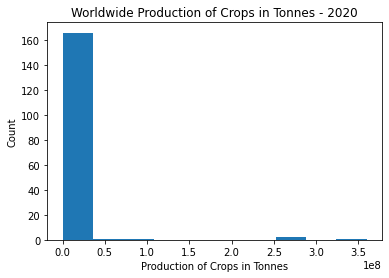

In [57]:
#Histogram to aid in optimisation of scaling for the map
plt.hist(df_world_production_corn_2020["Value"])
plt.xlabel("Production of Crops in Tonnes")
plt.ylabel("Count")
plt.title("Worldwide Production of Crops in Tonnes - 2020")
#Vast majority of data is between 0.0 and 0.4e08 -use this as a primary scale and then a separate colour representing data greater than this

In [74]:
#Check if the new scaling is an improvement
bar_max = 4e7
factor = 0.95  # Normalized location where continuous colorscale should end

fig = px.choropleth(
    df_world_production_corn_2020, 
    locations="Country Code",
    color="Value", 
    hover_name="Area",
    title = "Worldwide Production of Crops in tonnes - 2020",
    color_continuous_scale = [[0, 'rgb(166,206,227, 0.5)'],
                  [0.05, 'rgb(31,120,180,0.5)'],
                  [0.2, 'rgb(178,223,138,0.5)'],
                  [0.5, 'rgb(51,160,44,0.5)'],
                  [factor, 'rgb(251,154,153,0.5)'],
                  [factor, 'rgb(227,26,28,0.5)'],
                  [1, 'rgb(227,26,28,0.5)']]
)
fig.show()
#Scale is better but given the upward trend in production over time this scale is still relatively bottom heavy for the most recent year

In [81]:
#Further optimise the scale
bar_max = 0.3e8
factor = 0.95  # Normalized location where continuous colorscale should end

fig = px.choropleth(
    df_world_production_corn_2020, 
    locations="Country Code",
    color="Value", 
    hover_name="Area",
    title = "Worldwide Production of Crops in tonnes - 2020",
    range_color = [0, bar_max/factor],
    color_continuous_scale = [[0, 'rgb(166,206,227, 0.5)'],
                  [0.05, 'rgb(31,120,180,0.5)'],
                  [0.2, 'rgb(178,223,138,0.5)'],
                  [0.5, 'rgb(51,160,44,0.5)'],
                  [factor, 'rgb(251,154,153,0.5)'],
                  [factor, 'rgb(227,26,28,0.5)'],
                  [1, 'rgb(227,26,28,0.5)']]
)
fig.show()
#This graph shows a better range- the colour range is utilised much bettwe than before
#Note that the red regions are not necessarily ideally represented however overall the world is well represented

In [87]:
#Visualise the data over time using an interactive map
bar_max = 0.3e8
factor = 0.95  # Normalized location where continuous colorscale should end

fig = px.choropleth(
    df_world_production_corn, 
    locations="Country Code",
    color="Value", 
    hover_name="Area",
    title = "Worldwide Production of Crops in tonnes",
    animation_frame = "Year",
    range_color = [0, bar_max/factor],
    color_continuous_scale = [[0, 'rgb(166,206,227, 0.5)'],
                  [0.05, 'rgb(31,120,180,0.5)'],
                  [0.2, 'rgb(178,223,138,0.5)'],
                  [0.5, 'rgb(51,160,44,0.5)'],
                  [factor, 'rgb(251,154,153,0.5)'],
                  [factor, 'rgb(227,26,28,0.5)'],
                  [1, 'rgb(227,26,28,0.5)']]
)
fig.show()